In [1]:
%matplotlib inline 
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import random
import math 

# Read hmeq.csv file
hmeq = pd.read_csv("hmeq.csv")

# Removing any unnecessary column, because the data were just 13 column, 
# so i assume that column more than 13 were unnecessary
hmeq_prepared = hmeq.drop(columns=['Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16'])

# Filling any missing data in dataset using their represntative column
hmeq_prepared = hmeq_prepared.fillna(hmeq_prepared.mean())

# Seeing the first 5 row of data
hmeq_prepared.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.000000,39025.00000,HomeImp,Other,10.5,0.000000,0.000000,94.366667,1.000000,9.000000,35.185829
1,1,1300,70053.000000,68400.00000,HomeImp,Other,7,0.000000,2.000000,121.833333,0.000000,14.000000,35.185829
2,1,1500,13500.000000,16700.00000,HomeImp,Other,4,0.000000,0.000000,149.466667,1.000000,10.000000,35.185829
3,1,1500,73756.449706,258073.78599,NaN,NaN,NaN,0.259136,0.449275,179.738555,1.237366,21.287456,35.185829
4,0,1700,97800.000000,112000.00000,HomeImp,Office,3,0.000000,0.000000,93.333333,0.000000,14.000000,35.185829


In [2]:
# Check Unique Value for some catagorical column
for column in ["BAD", "REASON", "JOB"]:
    print (hmeq_prepared[column].unique())

[ 1  0  3 10]
['HomeImp' nan 'DebtCon' 'DebtCons']
['Other' nan 'Office' 'Sales' 'Mgr' 'ProfExe' 'Self' 'Othe']


In [3]:
# Preparing data, changing catagorycal data into numeric data

# Mapping catagorical into numeric
hmeq_prepared['JOB'] = hmeq_prepared['JOB'].map({'Other': 0, 'Office':1, 'Sales':2, 'Mgr':3, 'ProfExe':4, 'Self':5}) 
# Filling any missing data in "JOB" variable using 0 ("i assume it will be other")
hmeq_prepared['JOB'] = hmeq_prepared['JOB'].fillna(0) 

# Mapping catagorical into numeric
hmeq_prepared['REASON'] = hmeq_prepared['REASON'].map({'HomeImp': 0, 'DebtCon': 1, 'DebtCons': 2}) 
# Filling any missing data in "REASON" variable using 0 ("i assume it will be HomeImp")
hmeq_prepared['REASON'] = hmeq_prepared['REASON'].fillna(1) 

# Clean typo in "BAD" variable (there is data that typed 10 instead of 1)
hmeq_prepared['BAD'] = hmeq_prepared['BAD'].replace(10, 1)
# Clean typo in "BAD" variable (there is data that typed 3 instead of 1,
# i assume they type 3 because the loan were bad)
hmeq_prepared['BAD'] = hmeq_prepared['BAD'].replace(3, 1) 

# Seeing first 5 data
hmeq_prepared.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.000000,39025.00000,0.0,0.0,10.5,0.000000,0.000000,94.366667,1.000000,9.000000,35.185829
1,1,1300,70053.000000,68400.00000,0.0,0.0,7,0.000000,2.000000,121.833333,0.000000,14.000000,35.185829
2,1,1500,13500.000000,16700.00000,0.0,0.0,4,0.000000,0.000000,149.466667,1.000000,10.000000,35.185829
3,1,1500,73756.449706,258073.78599,1.0,0.0,NaN,0.259136,0.449275,179.738555,1.237366,21.287456,35.185829
4,0,1700,97800.000000,112000.00000,0.0,1.0,3,0.000000,0.000000,93.333333,0.000000,14.000000,35.185829


In [4]:
# Fuction for cleaning outlier from data, it will fill the outlier using median of data
def cleanOutlier(dataSet, listColumn):
    for column in listColumn:
        Q1 = dataSet[column].quantile(0.25)
        Q3 = dataSet[column].quantile(0.75)
        IQR = Q3-Q1
        outlier = ((dataSet[column] < (Q1 - 1.5 * IQR)) | (dataSet[column] > (Q3 + 1.5 * IQR)))
        dataSet[outlier] = np.nan
        dataSet[column] = dataSet[column].fillna(dataSet.median())

# Normalize the data using MinMaxScaler, so the value of data will around 0-1
def normalizeDataset(dataset, listColumn=[]):
    if (len(listColumn) > 0):
        for column in listColumn:
            max_value = dataset[column].max()
            min_value = dataset[column].min()
            dataset[column] = (dataset[column] - min_value) / (max_value - min_value)
    else:
        dataset = (dataset - dataset.mean())/dataset.std()
        dataset = dataset.round(4) 

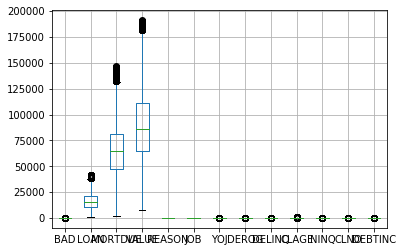

In [5]:
# Panda read the YOJ variable as "object" instead of number, so i changing it into number type
hmeq_prepared['YOJ'] = pd.to_numeric(hmeq_prepared['YOJ'], errors='coerce')
# Fill NaN value of YOJ using mean of YOJ
hmeq_prepared['YOJ'] = hmeq_prepared['YOJ'].fillna(hmeq_prepared['YOJ'].mean())
# Try to clean the data from outlier in any variable
cleanOutlier(hmeq_prepared, ['LOAN','MORTDUE','VALUE','CLNO','DEBTINC'])

# Seeing the boxplot result, to check if the outlier still exist
hmeq_prepared.boxplot()

In [6]:
# Try to normazise some variable in the dataset
normalizeDataset(hmeq_prepared, ['LOAN', 'JOB', 'REASON', 'MORTDUE','VALUE','YOJ','DEROG','DELINQ','CLAGE','NINQ','CLNO','DEBTINC'])

In [7]:
hmeq_prepared.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
BAD,1.0,-0.15,-0.093,-0.11,-0.068,-0.022,-0.064,0.22,0.33,-0.15,0.064,-0.042,0.12
LOAN,-0.15,1.0,0.16,0.33,0.33,0.064,0.12,-0.014,-0.061,0.095,0.028,0.12,0.083
MORTDUE,-0.093,0.16,1.0,0.77,0.061,0.24,-0.075,-0.029,-0.018,0.091,-0.02,0.28,0.12
VALUE,-0.11,0.33,0.77,1.0,0.11,0.32,0.0044,-0.05,-0.0021,0.19,-0.013,0.35,0.12
REASON,-0.068,0.33,0.061,0.11,1.0,-0.019,-0.053,-0.0027,-0.027,-0.01,0.062,0.14,0.046
JOB,-0.022,0.064,0.24,0.32,-0.019,1.0,-0.012,-0.037,0.024,0.088,-0.036,0.24,-0.088
YOJ,-0.064,0.12,-0.075,0.0044,-0.053,-0.012,1.0,-0.059,0.054,0.22,-0.031,0.042,-0.079
DEROG,0.22,-0.014,-0.029,-0.05,-0.0027,-0.037,-0.059,1.0,0.15,-0.077,0.39,0.011,0.025
DELINQ,0.33,-0.061,-0.018,-0.0021,-0.027,0.024,0.054,0.15,1.0,0.013,0.015,0.13,0.043
CLAGE,-0.15,0.095,0.091,0.19,-0.01,0.088,0.22,-0.077,0.013,1.0,-0.082,0.18,-0.032


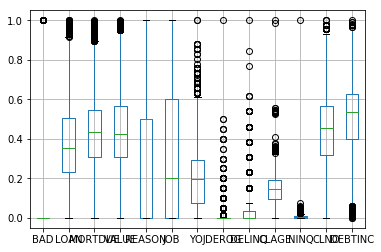

In [8]:
hmeq_prepared.boxplot()

In [9]:
# Saving the prepared hmeq to new csv file called hmeq_prepared.csv
hmeq_prepared.to_csv('hmeq_prepared.csv', sep=',', encoding='utf-8',index=False)